## Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To give multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


## Loading Dataset

In [3]:
spiral_df = pd.read_csv(r"C:\Task\demo_data\8.twospirals.csv",header = None)

### Insights of Dataset

In [4]:
spiral_df.head()
spiral_df.shape
spiral_df.info()

,0,1,2
0,-2.543456,-10.816358,0
1,9.434466,-2.572000,0
2,3.368646,-10.194671,0
3,1.341407,-4.204140,0
4,9.547758,-2.220580,0


(2000, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2000 non-null   float64
 1   1       2000 non-null   float64
 2   2       2000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


### Plotting Scatterplot to visualize the input and output

In [5]:
# for HD visualizations
%config InlineBackend.figure_format='retina'

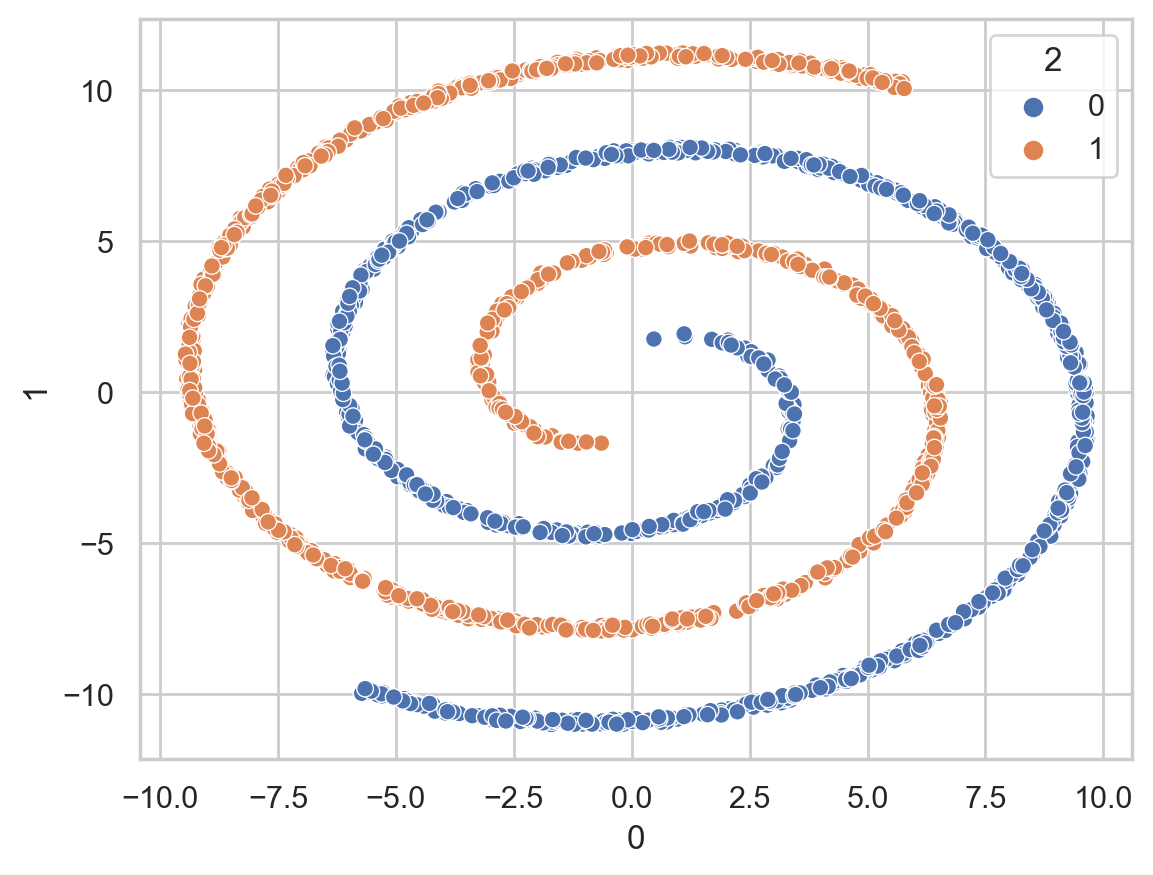

In [6]:
sns.set(style='whitegrid')
sns.scatterplot(x = spiral_df[0],y = spiral_df[1] ,hue = spiral_df[2],data = spiral_df);

### Train & test Split of the dataset

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(spiral_df[[0,1]], spiral_df[2], test_size = 0.2)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
# Performing standardization 
scaler = StandardScaler()
X_trainf = scaler.fit_transform(X_train)
X_testf = scaler.transform(X_test)

## Building Model 

## 1st Round

In [11]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [12]:
model = Sequential()
model.add(Dense(8,activation = 'relu',kernel_initializer = 'he_uniform',input_dim = 2)) # No.of Neurons
model.add(Dense(5,activation = 'relu',kernel_initializer = 'glorot_uniform'))
model.add(Dense(3,activation = 'relu',kernel_initializer = 'glorot_uniform'))
model.add(Dense(2,activation = 'relu',kernel_initializer = 'glorot_uniform'))

model.add(Dense(1,activation = 'sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 3)                 18        
                                                                 
 dense_3 (Dense)             (None, 2)                 8         
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 98
Trainable params: 98
Non-trainable params: 0
_________________________________________________________________


### Model Compilation and Training 

In [14]:
model.compile(optimizer ='Adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(X_trainf,y_train,batch_size=10,epochs=150,validation_split=0.2)

Epoch 1/150


C:\Users\prave\anaconda3\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


128/128 [==============================] - 1s 3ms/step - loss: 0.6903 - accuracy: 0.4961 - val_loss: 0.6815 - val_accuracy: 0.6375
Epoch 2/150
128/128 [==============================] - 0s 2ms/step - loss: 0.6730 - accuracy: 0.6039 - val_loss: 0.6477 - val_accuracy: 0.6562
Epoch 3/150
128/128 [==============================] - 0s 2ms/step - loss: 0.6532 - accuracy: 0.6398 - val_loss: 0.6283 - val_accuracy: 0.6625
Epoch 4/150
128/128 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.6562 - val_loss: 0.6200 - val_accuracy: 0.6875
Epoch 5/150
128/128 [==============================] - 0s 2ms/step - loss: 0.6368 - accuracy: 0.6625 - val_loss: 0.6135 - val_accuracy: 0.6844
Epoch 6/150
128/128 [==============================] - 0s 2ms/step - loss: 0.6324 - accuracy: 0.6687 - val_loss: 0.6097 - val_accuracy: 0.6844
Epoch 7/150
128/128 [==============================] - 0s 2ms/step - loss: 0.6282 - accuracy: 0.6617 - val_loss: 0.6084 - val_accuracy: 0.6812
Epoch 8/150

### Evaluation of Model

In [16]:
y_pred = model.predict(X_testf) 

13/13 [==============================] - 0s 1ms/step


In [17]:
y_capf = np.where(y_pred>0.5,1,0)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

0.93

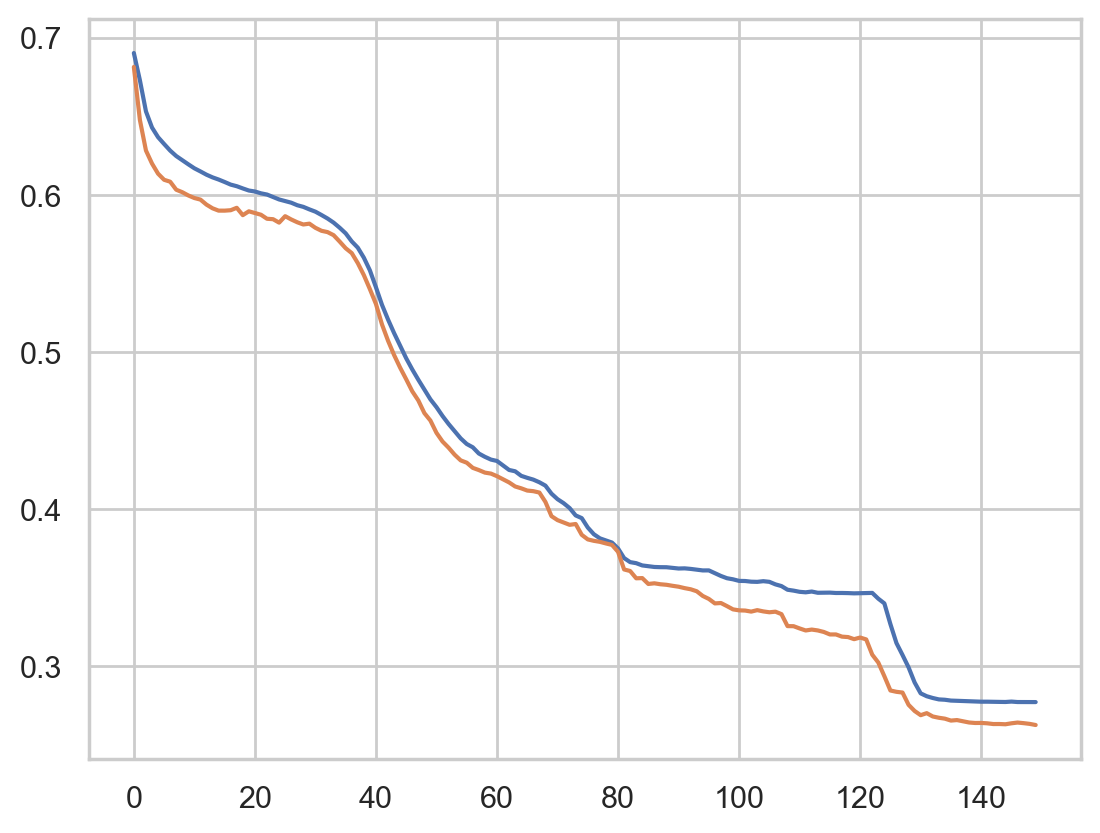

In [19]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

### Plotting Decision Regions

In [20]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 9s 978us/step


<AxesSubplot: >

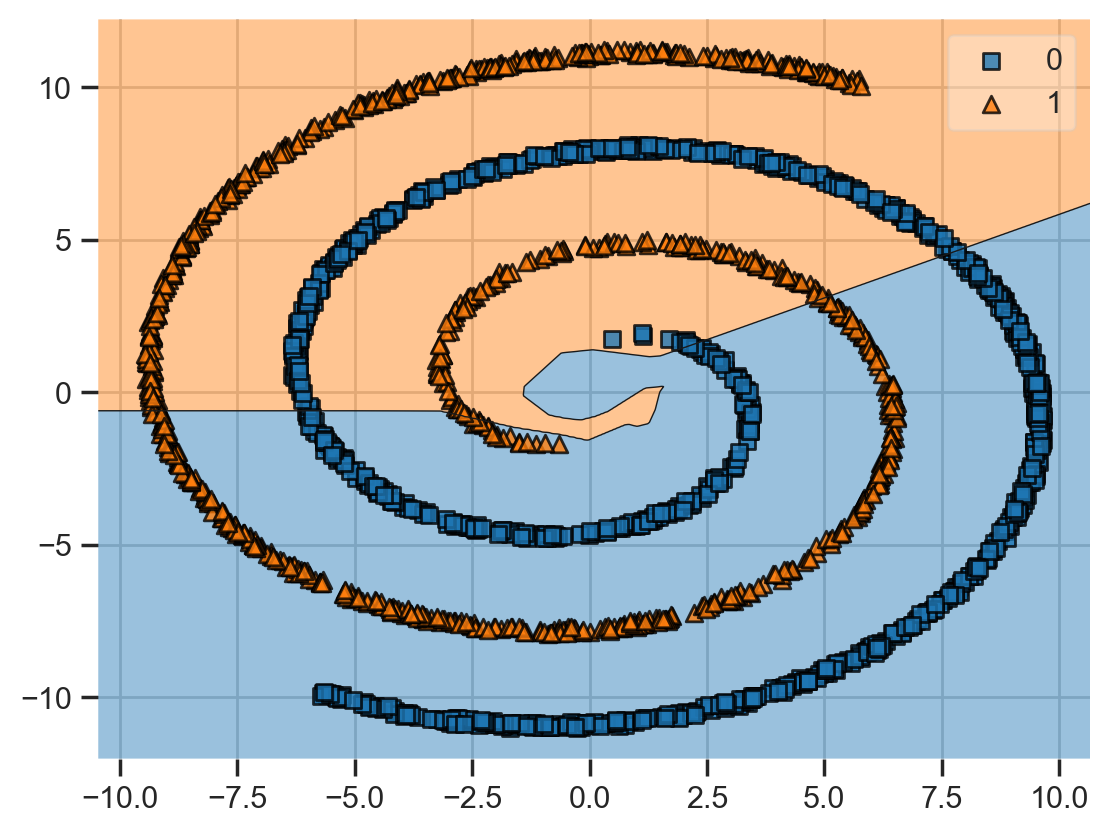

In [21]:
plot_decision_regions(spiral_df[[0,1]].values, spiral_df[2].values.astype(int), clf = model)

## 2nd Round

In [31]:
model = Sequential()
model.add(Dense(10,activation='relu', kernel_initializer = "he_uniform",input_dim = 2))

model.add(Dense(8,activation='relu', kernel_initializer = "he_uniform"))

model.add(Dense(7,activation='relu', kernel_initializer = "he_uniform"))

model.add(Dense(6,activation='relu', kernel_initializer = "he_uniform"))

model.add(Dense(5,activation='relu', kernel_initializer = "he_uniform"))

model.add(Dense(3,activation='relu', kernel_initializer = "he_uniform"))

model.add(Dense(2,activation='relu', kernel_initializer = "he_uniform"))
model.add(Dense(1,activation='sigmoid'))

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                30        
                                                                 
 dense_16 (Dense)            (None, 8)                 88        
                                                                 
 dense_17 (Dense)            (None, 7)                 63        
                                                                 
 dense_18 (Dense)            (None, 6)                 48        
                                                                 
 dense_19 (Dense)            (None, 5)                 35        
                                                                 
 dense_20 (Dense)            (None, 3)                 18        
                                                                 
 dense_21 (Dense)            (None, 2)                

### Model Compilation and Training 

In [33]:
model.compile(optimizer ='Adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [34]:
history = model.fit(X_trainf,y_train,batch_size=10,epochs=300,validation_split=0.2)

Epoch 1/300


C:\Users\prave\anaconda3\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


128/128 [==============================] - 1s 3ms/step - loss: 0.7843 - accuracy: 0.5938 - val_loss: 0.6736 - val_accuracy: 0.6656
Epoch 2/300
128/128 [==============================] - 0s 2ms/step - loss: 0.6523 - accuracy: 0.6633 - val_loss: 0.6642 - val_accuracy: 0.6875
Epoch 3/300
128/128 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.6500 - val_loss: 0.6571 - val_accuracy: 0.6625
Epoch 4/300
128/128 [==============================] - 0s 2ms/step - loss: 0.6396 - accuracy: 0.6594 - val_loss: 0.6479 - val_accuracy: 0.6531
Epoch 5/300
128/128 [==============================] - 0s 2ms/step - loss: 0.6326 - accuracy: 0.6625 - val_loss: 0.6327 - val_accuracy: 0.6781
Epoch 6/300
128/128 [==============================] - 0s 2ms/step - loss: 0.6238 - accuracy: 0.6633 - val_loss: 0.6259 - val_accuracy: 0.6750
Epoch 7/300
128/128 [==============================] - 0s 2ms/step - loss: 0.6201 - accuracy: 0.6625 - val_loss: 0.6187 - val_accuracy: 0.6750
Epoch 8/300

### Evaluation of Model

In [35]:
y_pred = model.predict(X_testf) 

13/13 [==============================] - 0s 1ms/step


In [36]:
y_capf = np.where(y_pred>0.5,1,0)

In [37]:
accuracy_score(y_test,y_capf)

0.7325

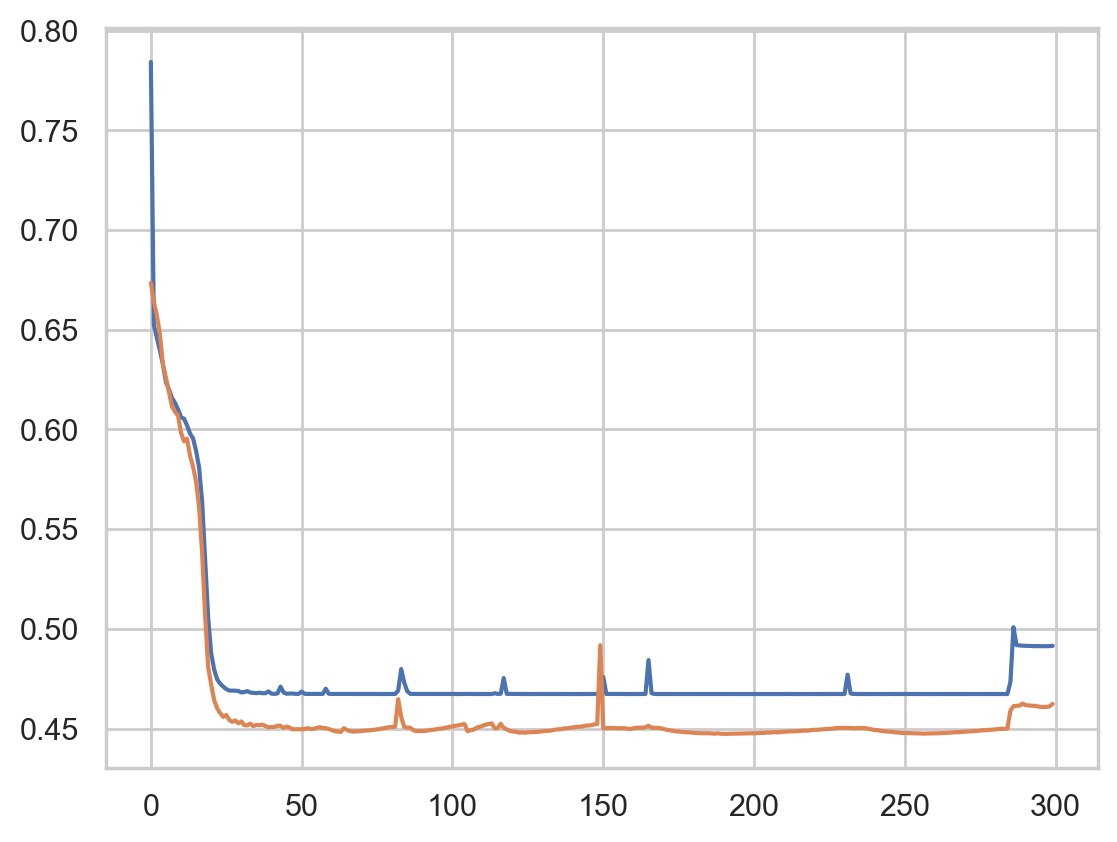

In [38]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

9600/9600 [==============================] - 9s 949us/step


<AxesSubplot: >

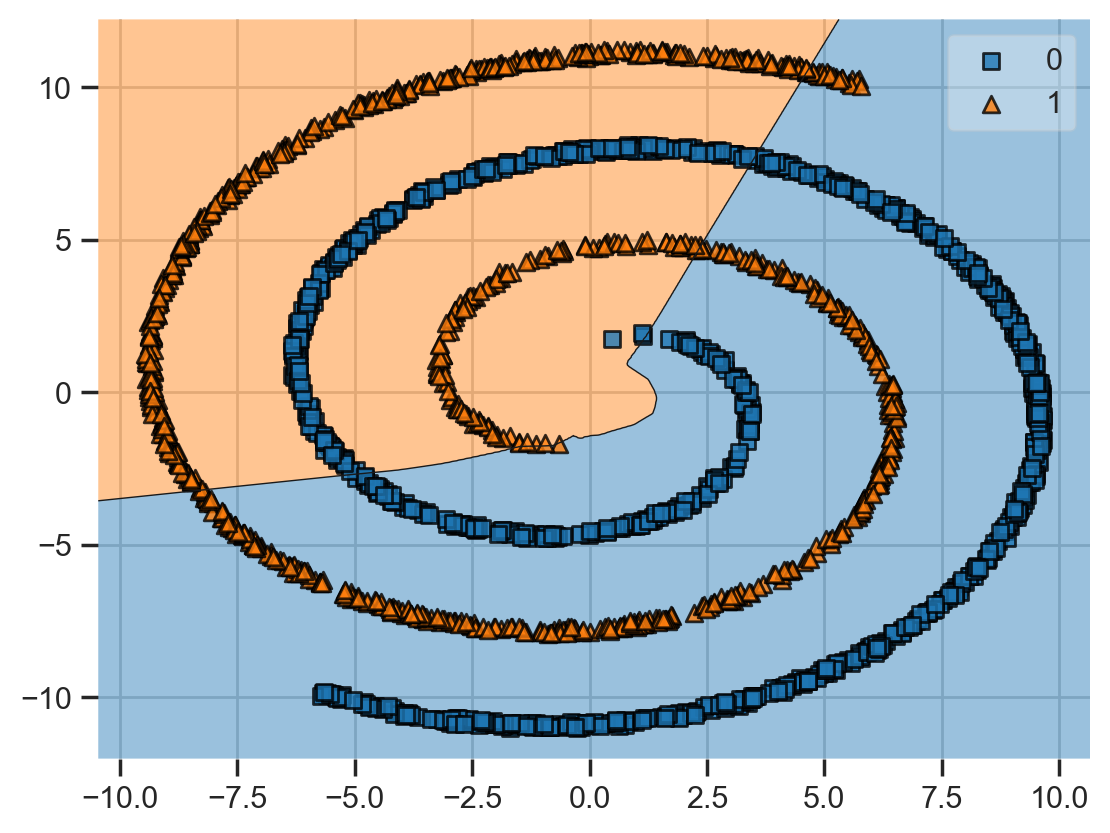

In [39]:
plot_decision_regions(spiral_df[[0,1]].values, spiral_df[2].values.astype(int), clf = model)